In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Aviation-LLM/ASRS_DBOnline_DS1.csv', header=[0,1])

In [3]:
# Flatten the columns for easier access
df.columns = ['_'.join(col).strip() for col in df.columns.values]

In [4]:
keep_columns = [
    '_ACN',
    'Time_Date',
    'Time_Local Time Of Day',
    'Place_State Reference',
    'Aircraft 1_Aircraft Operator',
    'Aircraft 1_Mission',
    'Aircraft 1_Make Model Name',
    'Aircraft 1_Flight Phase',
    'Component_Aircraft Component',
    'Person 1_Function',
    'Person 1_Qualification',
    'Person 1_Human Factors',
    'Events_Anomaly',
    'Events_Detector',
    'Events_When Detected',
    'Events_Result',
    'Assessments_Contributing Factors / Situations',
    'Assessments_Primary Problem',
    'Report 1_Narrative',
    'Report 1_Synopsis'
]

In [5]:
# Select only the specified columns
df = df[keep_columns]

In [6]:
# Drop rows with missing narratives or synopses, as they are essential
df = df.dropna(subset=['Report 1_Narrative', 'Report 1_Synopsis'])

In [7]:
# Clean text by removing extra spaces
df['Report 1_Narrative'] = df['Report 1_Narrative'].str.strip()
df['Report 1_Synopsis'] = df['Report 1_Synopsis'].str.strip()

In [8]:
# Save the cleaned data for future use
df.to_csv('cleaned_ASRS_data.csv', index=False)

In [9]:
from google.colab import files
# files.download('cleaned_ASRS_data.csv')

In [10]:
df.head()

,_ACN,Time_Date,Time_Local Time Of Day,Place_State Reference,Aircraft 1_Aircraft Operator,Aircraft 1_Mission,Aircraft 1_Make Model Name,Aircraft 1_Flight Phase,Component_Aircraft Component,Person 1_Function,Person 1_Qualification,Person 1_Human Factors,Events_Anomaly,Events_Detector,Events_When Detected,Events_Result,Assessments_Contributing Factors / Situations,Assessments_Primary Problem,Report 1_Narrative,Report 1_Synopsis
0,1508441,201801,1801-2400,US,Air Carrier,Passenger,A319,Final Approach; Initial Approach,Landing Gear,Captain; Pilot Flying,Flight Crew Air Transport Pilot (ATP),Troubleshooting,Aircraft Equipment Problem Critical,Person Flight Crew,In-flight,Flight Crew Returned To Departure Airport; Fli...,Aircraft,Aircraft,This flight was a ferry flight to reposition t...,A319 Captain reported malfunctioning landing g...
1,1508985,201801,0601-1200,US,Air Carrier,Passenger,A319,Initial Climb,NaN,Captain,Flight Crew Air Transport Pilot (ATP),Physiological - Other,Flight Deck / Cabin / Aircraft Event Smoke / F...,Person Flight Attendant,In-flight,General Work Refused; General Physical Injury ...,Aircraft; Human Factors,Aircraft,About 5-10 minutes after takeoff in climb the ...,A319 Captain reported the Flight Attendants we...
2,1509474,201801,0601-1200,NJ,Air Carrier,Passenger,A320,Initial Approach,NaN,Pilot Not Flying; First Officer,Flight Crew Air Transport Pilot (ATP),Situational Awareness; Workload,Conflict NMAC; Deviation / Discrepancy - Proce...,Automation Aircraft RA,In-flight,Flight Crew Took Evasive Action,Human Factors,Human Factors,While on the arrival to EWR; we were having a ...,A320 First Officer reported an NMAC on arrival...
3,1509520,201801,0601-1200,CA,Air Carrier,Passenger,A319,Climb,NaN,Pilot Flying,Flight Crew Air Transport Pilot (ATP),Communication Breakdown; Distraction; Human-Ma...,ATC Issue All Types; Conflict Airborne Conflic...,Automation Aircraft RA; Person Flight Crew,In-flight,Air Traffic Control Issued Advisory / Alert; A...,Environment - Non Weather Related; Human Facto...,Human Factors,We departed 26R on SNSHN2 DEP which is routed ...,A319 pilot reported airborne conflict (RA) wit...
4,1511841,201801,0601-1200,US,Air Carrier,Passenger,B737-800,Descent; Landing; Initial Approach; Final Appr...,Recirculation Fan,Captain; Pilot Not Flying,Flight Crew Air Transport Pilot (ATP),Distraction; Physiological - Other; Situationa...,Aircraft Equipment Problem Less Severe; Flight...,Person Flight Crew,Taxi; In-flight,General Physical Injury / Incapacitation; Gene...,Aircraft; Human Factors,Aircraft,During an idle descent passing thru approximat...,B737-800 flight crew reported smelling odors i...


In [11]:
# Assuming 'df' is your DataFrame loaded from 'cleaned_ASRS_data.csv'

total_incidents = len(df)
print(f"Total number of incidents: {total_incidents}")

Total number of incidents: 1107


# **EDA **

In [12]:
# Convert Time_Date to datetime
df['Time_Date'] = pd.to_datetime(df['Time_Date'], format='%Y%m')

# Extract year and month for grouping
df['Year'] = df['Time_Date'].dt.year
df['Month'] = df['Time_Date'].dt.to_period('M')

# Verify the conversion
print(df[['Time_Date', 'Year', 'Month']].head())

   Time_Date  Year    Month
0 2018-01-01  2018  2018-01
1 2018-01-01  2018  2018-01
2 2018-01-01  2018  2018-01
3 2018-01-01  2018  2018-01
4 2018-01-01  2018  2018-01


In [13]:
print(df.isnull().sum())

_ACN                                               0
Time_Date                                          0
Time_Local Time Of Day                           165
Place_State Reference                            105
Aircraft 1_Aircraft Operator                       1
Aircraft 1_Mission                                 0
Aircraft 1_Make Model Name                         0
Aircraft 1_Flight Phase                            0
Component_Aircraft Component                     185
Person 1_Function                                 14
Person 1_Qualification                            34
Person 1_Human Factors                           364
Events_Anomaly                                     0
Events_Detector                                   13
Events_When Detected                              29
Events_Result                                      0
Assessments_Contributing Factors / Situations      0
Assessments_Primary Problem                        0
Report 1_Narrative                            

In [14]:
import pandas as pd

# Assuming 'df' is your DataFrame
flight_phase_counts = df['Aircraft 1_Flight Phase'].value_counts()

print("Flight Phase Counts:")
print(flight_phase_counts)


Flight Phase Counts:
Aircraft 1_Flight Phase
Cruise                                                365
Climb                                                 264
Takeoff / Launch                                      109
Descent                                               100
Final Approach                                         57
Initial Approach                                       49
Initial Climb                                          37
Climb; Initial Climb                                   27
Landing                                                25
Initial Climb; Climb                                   14
Initial Climb; Takeoff / Launch                         9
Cruise; Descent                                         6
Final Approach; Initial Approach                        5
Climb; Cruise                                           4
Final Approach; Landing                                 3
Initial Approach; Descent                               2
Cruise; Parked             

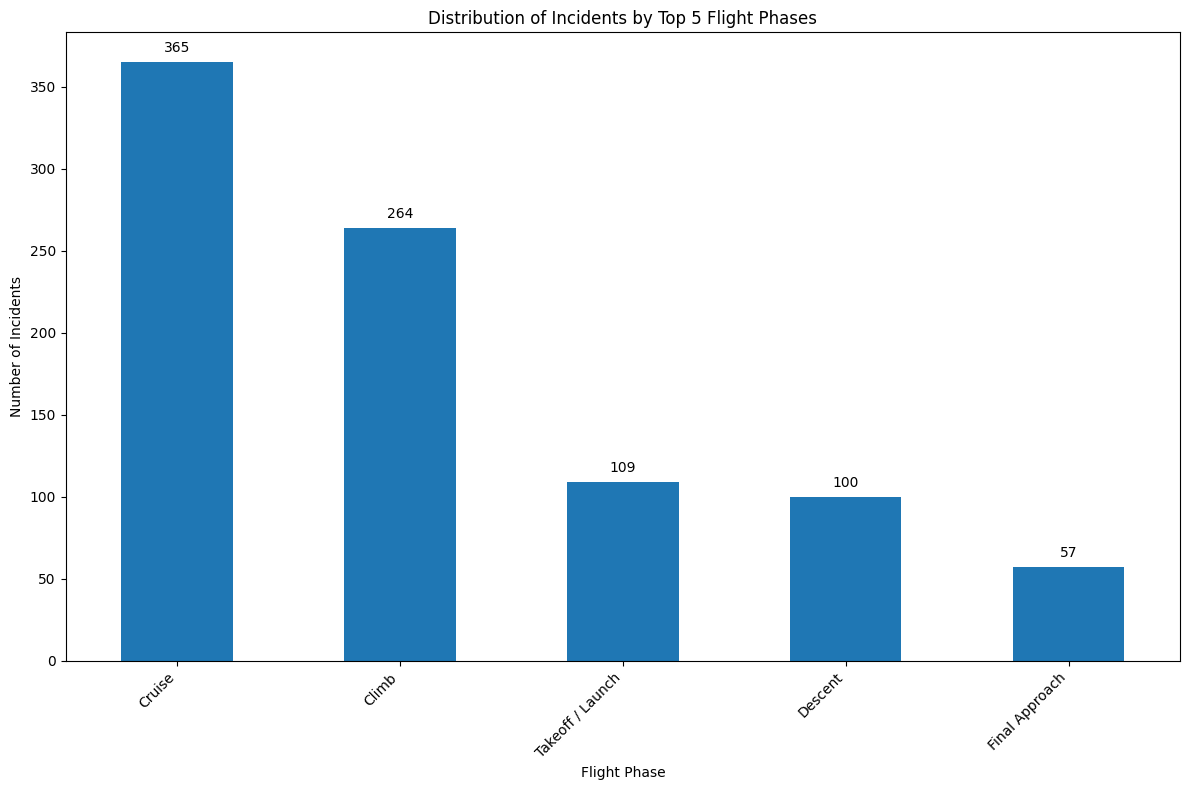

In [15]:
# Flight phase distribution

# Assuming 'df' is your DataFrame containing the 'Aircraft 1_Flight Phase' column

# Get the top N most popular flight phases (e.g., top 10)
top_n = 5  # You can change this to the desired number
top_flight_phases = df['Aircraft 1_Flight Phase'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only the top flight phases
filtered_df = df[df['Aircraft 1_Flight Phase'].isin(top_flight_phases)]

# Plot the distribution
plt.figure(figsize=(12, 8))
ax = filtered_df['Aircraft 1_Flight Phase'].value_counts().plot(kind='bar')
plt.title(f'Distribution of Incidents by Top {top_n} Flight Phases')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add the numbers on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.savefig('flight_phase_distribution.png')  # Save the plot to a file
plt.show()                                   # Display the plot
# files.download('flight_phase_distribution.png') # Download the saved file

In [16]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


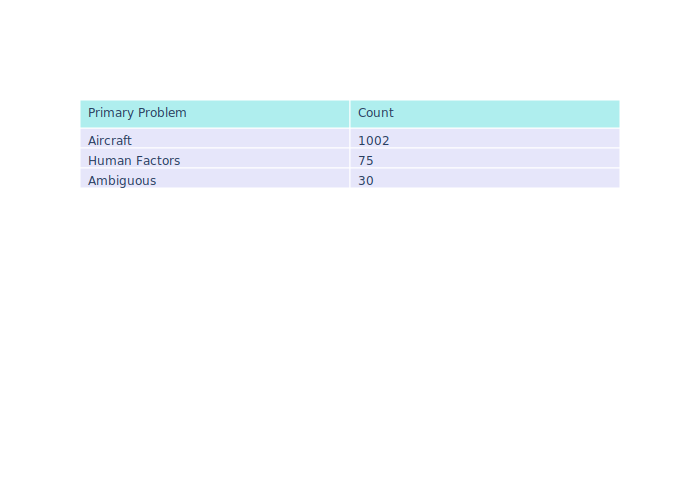

Total number of incidents in Primary Problem Distribution: 1107


In [17]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'svg' # or 'png', 'jpg', etc.

# Assuming 'df' is your DataFrame containing the 'Assessments_Primary Problem' column

# Get the value counts for the primary problems
primary_problem_counts = df['Assessments_Primary Problem'].value_counts()

# Calculate total incidents for Primary Problem Distribution
total_incidents_primary_problem = primary_problem_counts.sum()

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Primary Problem', 'Count'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[primary_problem_counts.index, primary_problem_counts.values],
               fill_color='lavender',
               align='left'))
])

pio.write_image(fig, 'primary_problem_distribution.png') # Save the chart as PNG
fig.show()

print(f"Total number of incidents in Primary Problem Distribution: {total_incidents_primary_problem}")
# files.download('primary_problem_distribution.png')

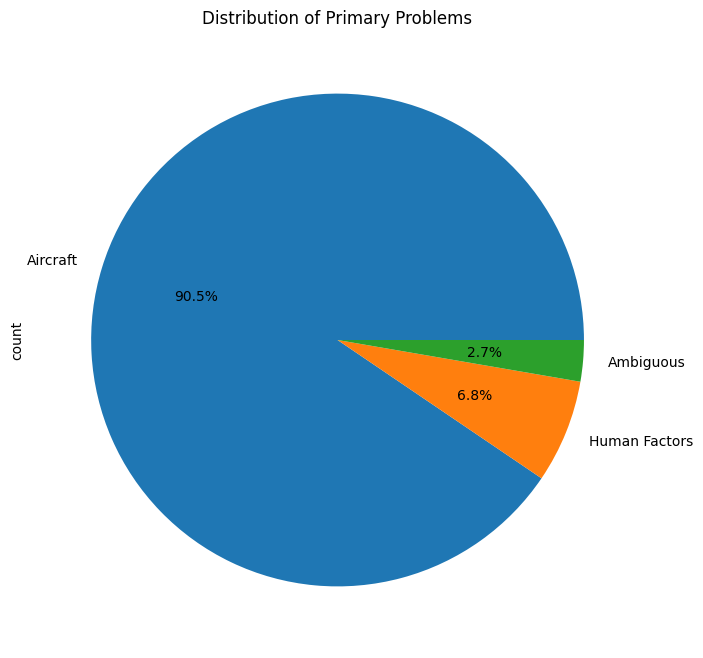

In [18]:
# Primary problem distribution
plt.figure(figsize=(8,8))
df['Assessments_Primary Problem'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Primary Problems')

# Save the plot to a file
plt.savefig('primary_problem_distribution_graph.png')

# Display the plot
plt.show()

# Download the saved file
# files.download('primary_problem_distribution_graph.png')

In [19]:

# Assuming 'df' is your DataFrame containing the 'Year' column

incidents_by_year = df.groupby('Year')['Year'].count()

print("Total Number of Incidents by Year:")
print(incidents_by_year)

Total Number of Incidents by Year:
Year
2018    117
2019    192
2020     87
2021     93
2022    241
2023    168
2024    209
Name: Year, dtype: int64


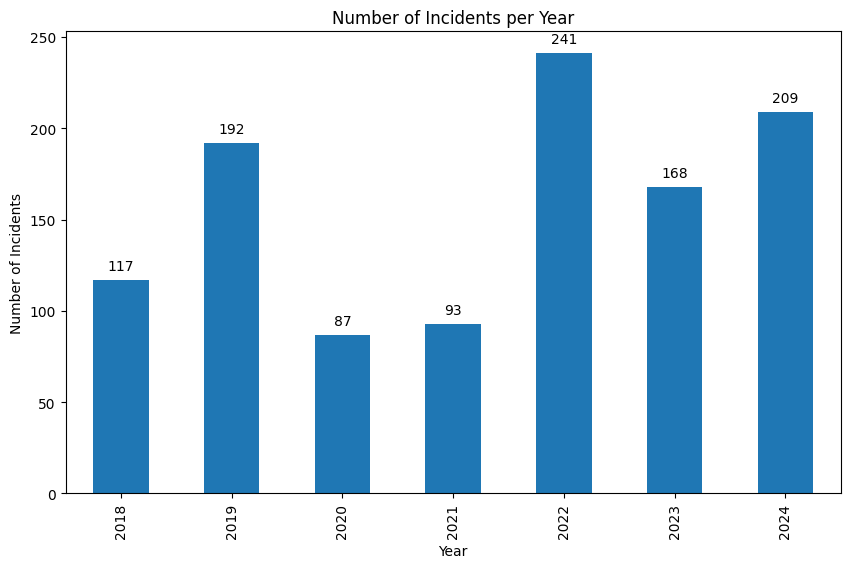

In [20]:
import matplotlib.pyplot as plt

# Number of Incidents per Year
plt.figure(figsize=(10, 6))
ax = df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot to a file
plt.savefig('incidents_per_year.png')  # You can change the filename and format if needed

# Display the plot
plt.show()


# Download the saved file
# files.download('incidents_per_year.png')

In [21]:
import pandas as pd

# Group by year and get the value counts of primary problems for each year
year_primary_problem = df.groupby('Year')['Assessments_Primary Problem'].value_counts().reset_index(name='Count')

# Print the total number of incidents for each year
print("Total Number of Incidents by Year:")
incidents_by_year = df.groupby('Year')['Year'].count()  # Calculate incidents_by_year
print(incidents_by_year)  # Print incidents_by_year

# Print the year and the primary problem for each year
print("\nYear and Primary Problem:")
for index, row in year_primary_problem.iterrows():
    year = row['Year']
    primary_problem = row['Assessments_Primary Problem']
    count = row['Count']
    print(f"Year: {year}, Primary Problem: {primary_problem}, Count: {count}")

Total Number of Incidents by Year:
Year
2018    117
2019    192
2020     87
2021     93
2022    241
2023    168
2024    209
Name: Year, dtype: int64

Year and Primary Problem:
Year: 2018, Primary Problem: Aircraft, Count: 91
Year: 2018, Primary Problem: Human Factors, Count: 16
Year: 2018, Primary Problem: Ambiguous, Count: 10
Year: 2019, Primary Problem: Aircraft, Count: 163
Year: 2019, Primary Problem: Human Factors, Count: 20
Year: 2019, Primary Problem: Ambiguous, Count: 9
Year: 2020, Primary Problem: Aircraft, Count: 76
Year: 2020, Primary Problem: Human Factors, Count: 10
Year: 2020, Primary Problem: Ambiguous, Count: 1
Year: 2021, Primary Problem: Aircraft, Count: 87
Year: 2021, Primary Problem: Human Factors, Count: 5
Year: 2021, Primary Problem: Ambiguous, Count: 1
Year: 2022, Primary Problem: Aircraft, Count: 226
Year: 2022, Primary Problem: Human Factors, Count: 10
Year: 2022, Primary Problem: Ambiguous, Count: 5
Year: 2023, Primary Problem: Aircraft, Count: 159
Year: 2023, 

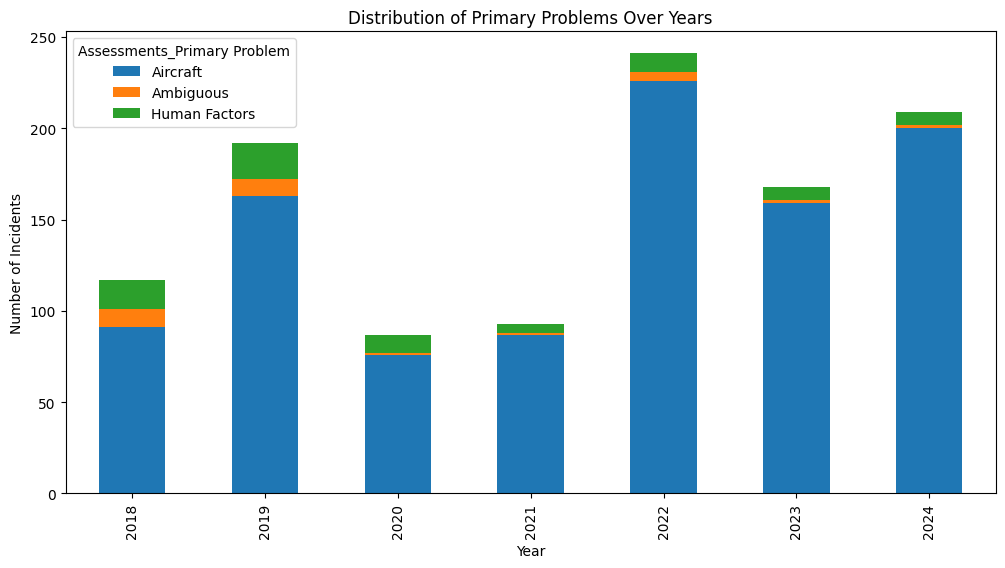

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

ct = pd.crosstab(df['Year'], df['Assessments_Primary Problem'])
ct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of Primary Problems Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Save the plot to a file
plt.savefig('primary_problems_over_years.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('primary_problems_over_years.png')

['1801-2400' '0601-1200' nan '1201-1800' '0001-0600']


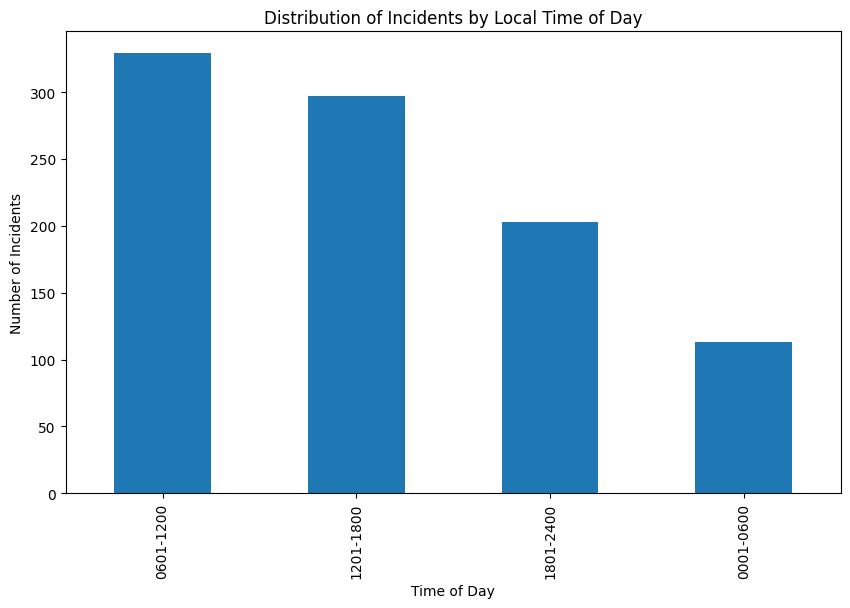

In [23]:
import matplotlib.pyplot as plt
from google.colab import files

print(df['Time_Local Time Of Day'].unique())
plt.figure(figsize=(10,6))
df['Time_Local Time Of Day'].value_counts().plot(kind='bar')
plt.title('Distribution of Incidents by Local Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')

# Save the plot to a file
plt.savefig('incidents_by_time_of_day.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('incidents_by_time_of_day.png')

In [24]:
import pandas as pd

# Assuming 'df' is your DataFrame

aircraft_incident_counts = df['Aircraft 1_Make Model Name'].value_counts()

print("Aircraft Name and Number of Incidents:")
print(aircraft_incident_counts)

Aircraft Name and Number of Incidents:
Aircraft 1_Make Model Name
B737-800                                   209
A320                                       159
B737 Undifferentiated or Other Model       152
A319                                       128
A321                                       128
B737-700                                   104
B737 Next Generation Undifferentiated       49
B767 Undifferentiated or Other Model        48
B777 Undifferentiated or Other Model        30
B777-200                                    24
B737-900                                    17
A330                                        16
B767-300 and 300 ER                         16
B737 MAX 8                                  10
B737-300                                     5
B737-400                                     4
B777-300                                     3
B767-400 and 400 ER                          2
B737 MAX 9                                   2
Airbus 318/319/320/321 Undifferentiated  

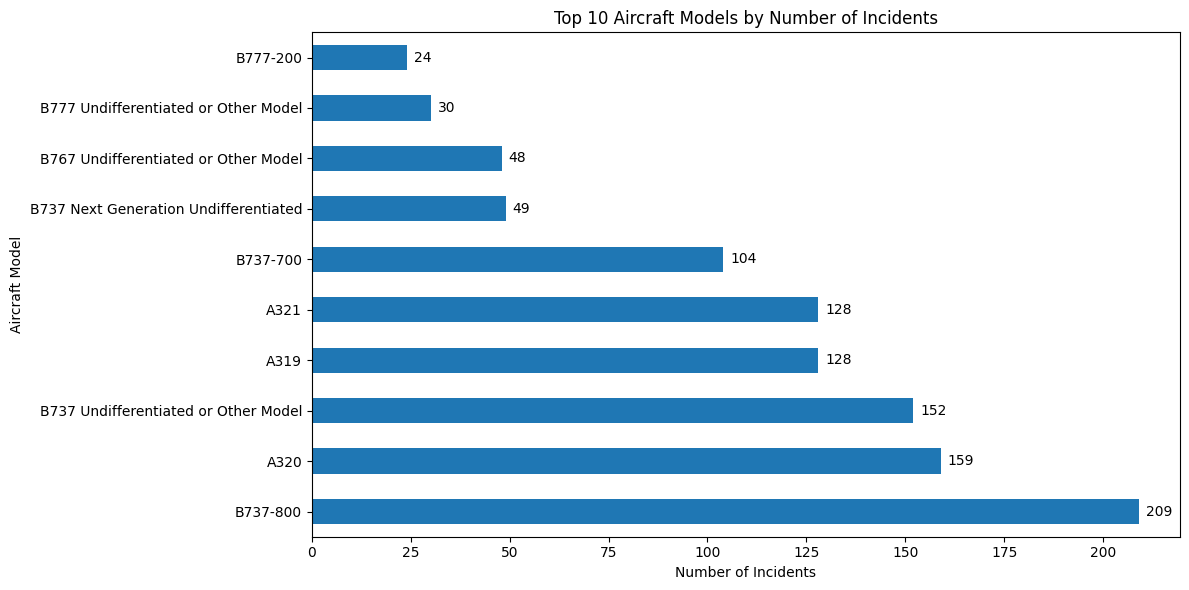

In [25]:
import matplotlib.pyplot as plt
from google.colab import files

# Which Aircraft had most incidents?

# Assuming 'df' is your DataFrame containing the 'Aircraft 1_Make Model Name' column

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
ax = df['Aircraft 1_Make Model Name'].value_counts().head(10).plot(kind='barh')  # Use horizontal bar chart
plt.title('Top 10 Aircraft Models by Number of Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Model')

# Add count labels to the right of the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the plot to a file
plt.savefig('top_aircraft_models.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('top_aircraft_models.png')

In [26]:
import pandas as pd

# Assuming 'df' is your DataFrame
top_components_counts = df['Component_Aircraft Component'].value_counts().head(10)

print("Top 10 Aircraft Components and Their Counts:")
print(top_components_counts)

Top 10 Aircraft Components and Their Counts:
Component_Aircraft Component
Turbine Engine                              172
Hydraulic Main System                        44
Engine                                       39
Hydraulic System                             36
Pressurization System                        30
Cockpit Window                               28
Air Conditioning and Pressurization Pack     24
Trailing Edge Flap                           20
Pressurization Control System                19
Powerplant Lubrication System                17
Name: count, dtype: int64


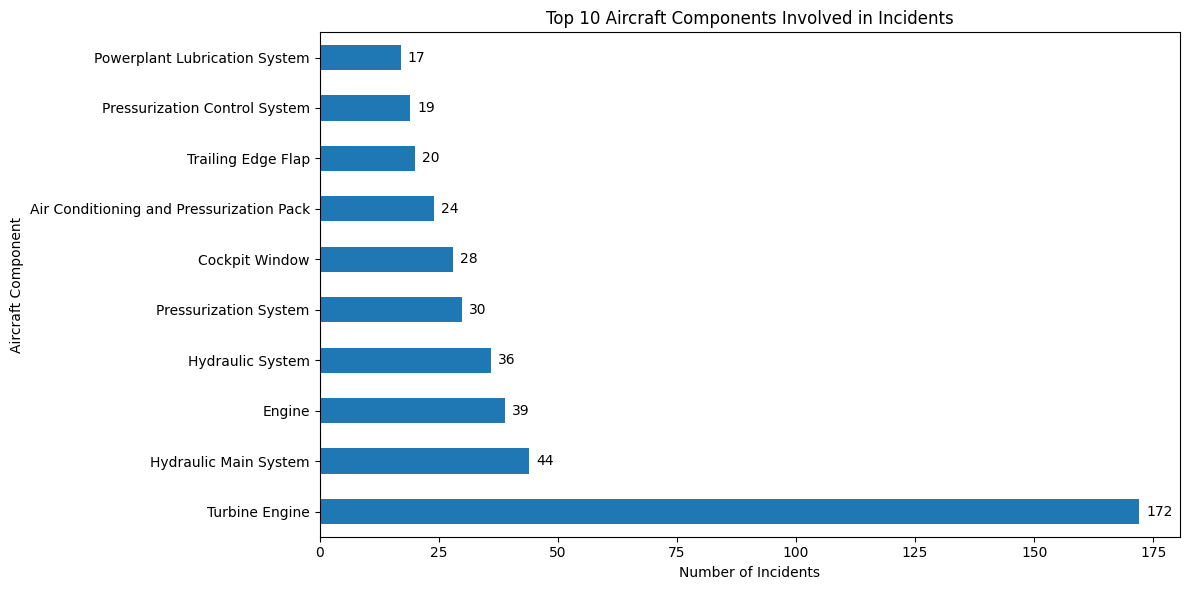

In [27]:
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(figsize=(12, 6))
ax = df['Component_Aircraft Component'].value_counts().head(10).plot(kind='barh')  # Use horizontal bar chart
plt.title('Top 10 Aircraft Components Involved in Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Component')

# Add count labels to the right of the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the plot to a file
plt.savefig('top_aircraft_components.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('top_aircraft_components.png')


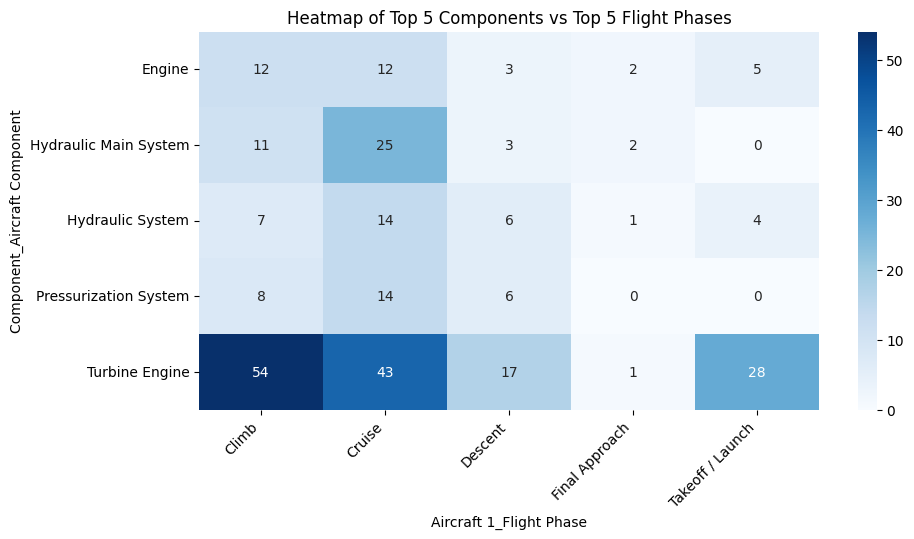

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

top_components = df['Component_Aircraft Component'].value_counts().head(5).index
top_phases = df['Aircraft 1_Flight Phase'].value_counts().head(5).index
filtered_df = df[df['Component_Aircraft Component'].isin(top_components) & df['Aircraft 1_Flight Phase'].isin(top_phases)]
ct = pd.crosstab(filtered_df['Component_Aircraft Component'], filtered_df['Aircraft 1_Flight Phase'])

# Create the figure and axes before plotting the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')  # Assign heatmap to ax

# Set title and adjust layout using the axes object
ax.set_title('Heatmap of Top 5 Components vs Top 5 Flight Phases')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)

# Save the plot to a file
plt.savefig('heatmap_components_phases.png', bbox_inches='tight')

# Display the plot
plt.show()

# Download the saved file
# files.download('heatmap_components_phases.png')

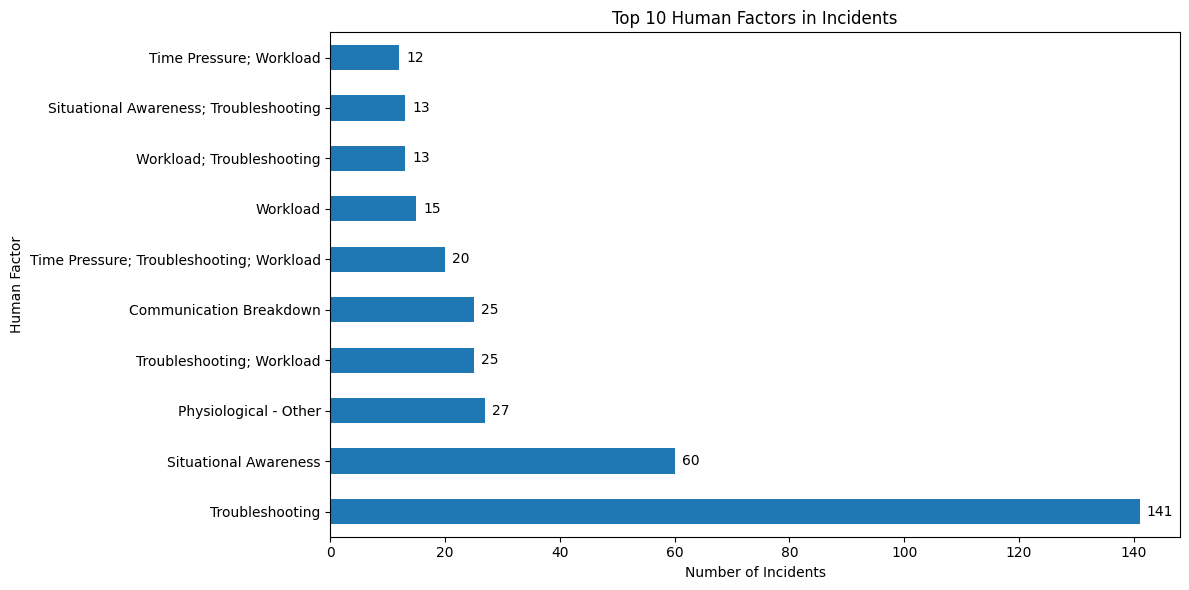

In [29]:
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(figsize=(12, 6))
ax = df['Person 1_Human Factors'].value_counts().head(10).plot(kind='barh')  # Use horizontal bar chart
plt.title('Top 10 Human Factors in Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Human Factor')

# Add count labels to the right of the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the plot to a file
plt.savefig('top_human_factors.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('top_human_factors.png')

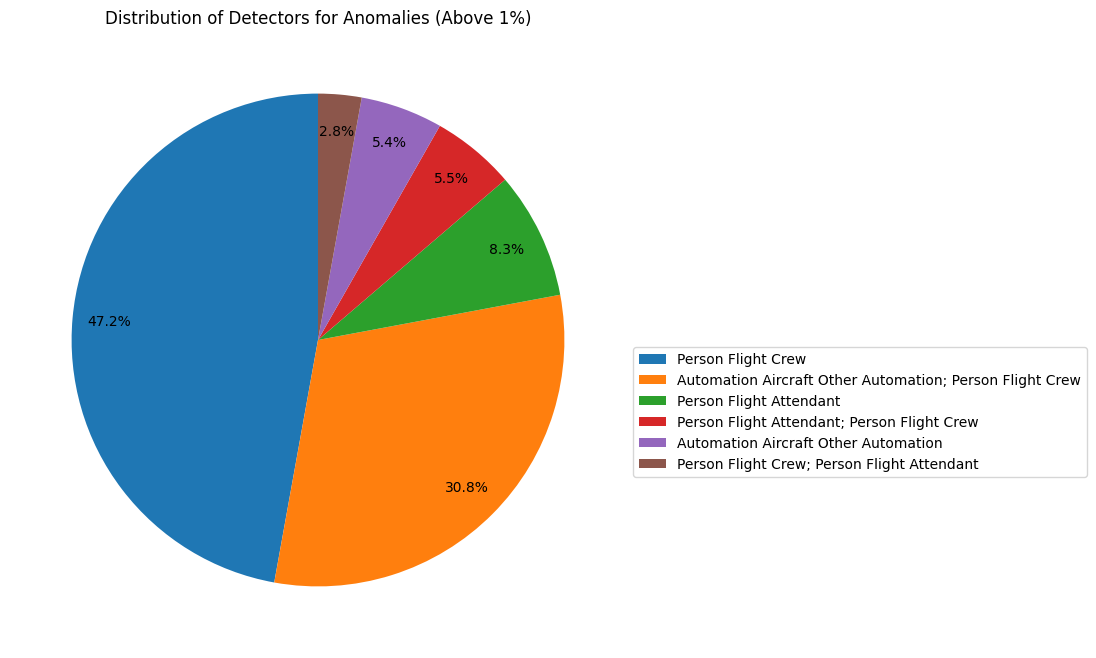

In [30]:
import matplotlib.pyplot as plt
from google.colab import files

# Assuming 'df' is your DataFrame containing the 'Events_Detector' column

# Calculate value counts and filter for values greater than 1%
detector_counts = df['Events_Detector'].value_counts(normalize=True)  # Normalize to get percentages
filtered_counts = detector_counts[detector_counts > 0.01]  # Filter for values > 1%

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_counts,
        labels=None,  # Remove labels on the pie chart
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10},
        pctdistance=0.85)
plt.title('Distribution of Detectors for Anomalies (Above 1%)', fontsize=12)
plt.legend(filtered_counts.index, loc='best', bbox_to_anchor=(1, 0.5))  # Place legend outside

# Save the plot to a file
plt.savefig('anomaly_detectors_distribution.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('anomaly_detectors_distribution.png')

<ipython-input-31-233963e861be>:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-31-233963e861be>:38: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



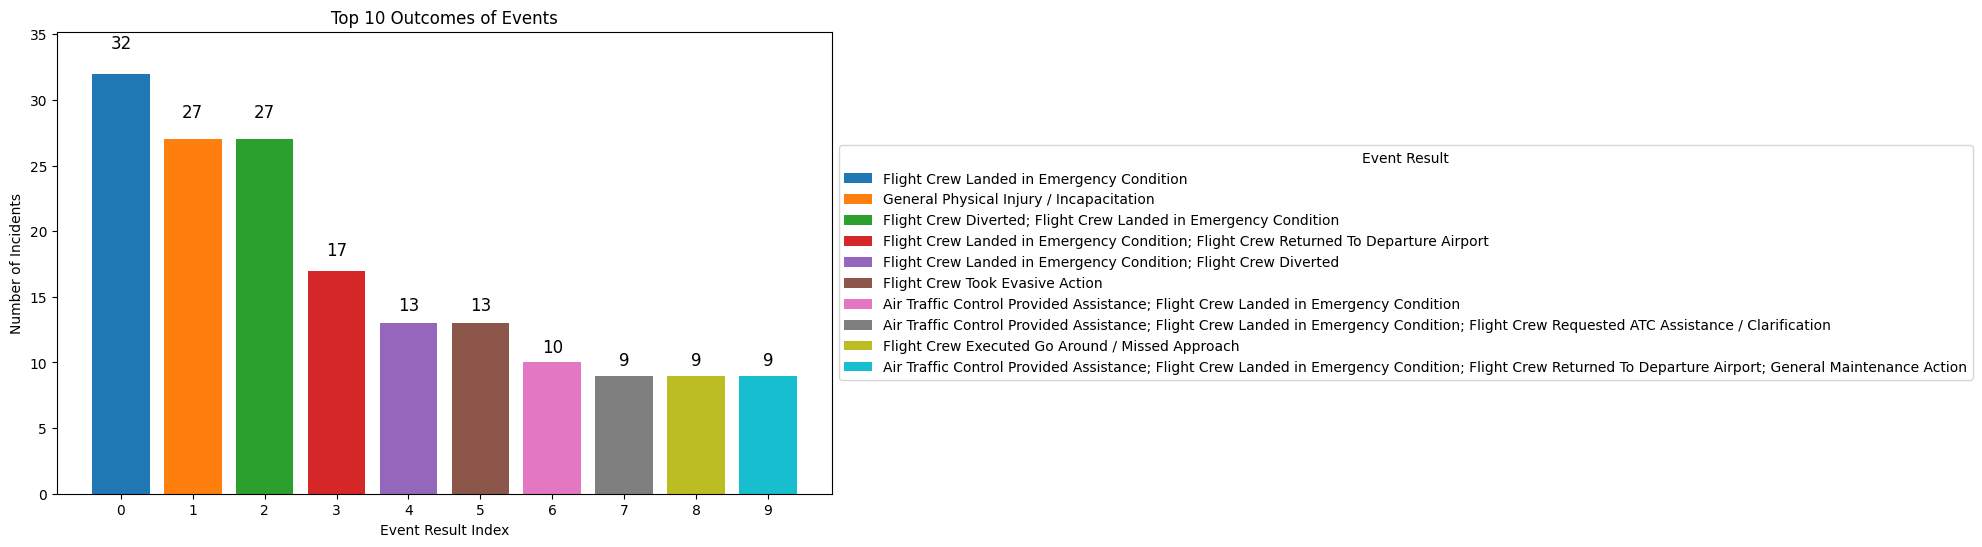

In [31]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy
from google.colab import files
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Events_Result' column

# Get the top N most frequent event results
top_n = 10  # Adjust as needed
event_result_counts = df['Events_Result'].value_counts().head(top_n)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Event Result': event_result_counts.index, 'Count': event_result_counts.values})

# Create a list of unique colors for each bar
colors = plt.cm.get_cmap('tab10', top_n)  # Use a colormap with enough colors
color_list = [colors(i) for i in range(top_n)]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(plot_df)), plot_df['Count'], color=color_list)  # Use color_list for bar colors
plt.title('Top 10 Outcomes of Events')
plt.xlabel('Event Result Index')  # Use index instead of full description
plt.ylabel('Number of Incidents')
plt.xticks(np.arange(len(plot_df)), np.arange(len(plot_df)))  # Set x-axis ticks to indices

# Create a custom legend
plt.legend(bars, plot_df['Event Result'], title='Event Result', loc='center left', bbox_to_anchor=(1, 0.5))

# Add count labels on top of bars with adjusted alignment
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height,  # Adjust vertical position
             str(int(height)), ha='center', va='bottom', fontsize=12)

plt.ylim(0, max(plot_df['Count']) * 1.1)  # Adjust y-axis limit

plt.tight_layout()

# Save the plot to a file
plt.savefig('top_10_outcomes.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('top_10_outcomes.png')

<ipython-input-32-76a0eeae1aaa>:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



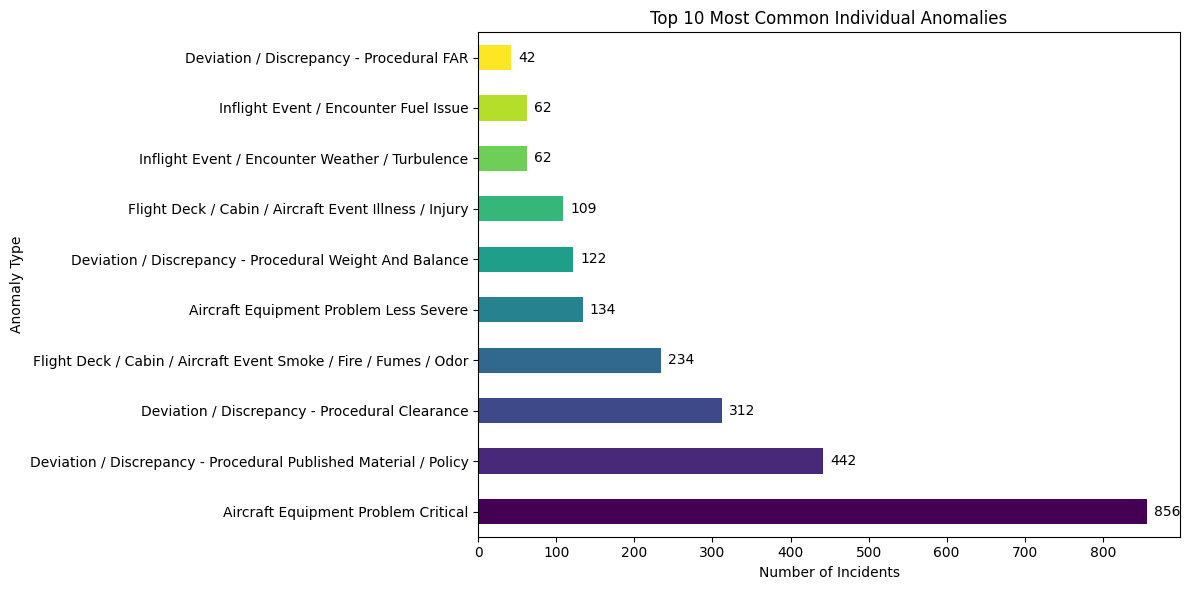

In [32]:
 #Assuming df is your DataFrame loaded from 'cleaned_ASRS_data.csv'
# Split anomalies by semicolon and explode into individual entries
anomalies_split = df['Events_Anomaly'].str.split(';').explode().str.strip()

# Remove 'Anomaly.' prefix if present to shorten labels
anomalies_split = anomalies_split.str.replace('Anomaly.', '', regex=False)

# Get the top 10 most common anomalies
top_anomalies = anomalies_split.value_counts().head(10)

# Assuming df is your DataFrame loaded from 'cleaned_ASRS_data.csv'
# Split anomalies by semicolon and explode into individual entries
anomalies_split = df['Events_Anomaly'].str.split(';').explode().str.strip()

# Remove 'Anomaly.' prefix if present to shorten labels
anomalies_split = anomalies_split.str.replace('Anomaly.', '', regex=False)

# Get the top 10 most common anomalies
top_anomalies = anomalies_split.value_counts().head(10)


# Create a horizontal bar chart with adjusted settings and colors
plt.figure(figsize=(12, 6))
num_bars = len(top_anomalies)  # Define num_bars here
colors = plt.cm.get_cmap('viridis', num_bars)  # Choose a colormap
ax = top_anomalies.plot(kind='barh', color=[colors(i) for i in range(num_bars)])  # Apply colors

plt.title('Top 10 Most Common Individual Anomalies')
plt.xlabel('Number of Incidents')  # Swapped x and y labels
plt.ylabel('Anomaly Type')  # Swapped x and y labels

# Add count labels to the right of the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent clipping

# Save the plot to a file
plt.savefig('anomaly_chart.png')  # Save the plot

# Display the plot
plt.show()

# Download the saved file
# files.download('anomaly_chart.png')

<ipython-input-33-976af174c8c4>:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



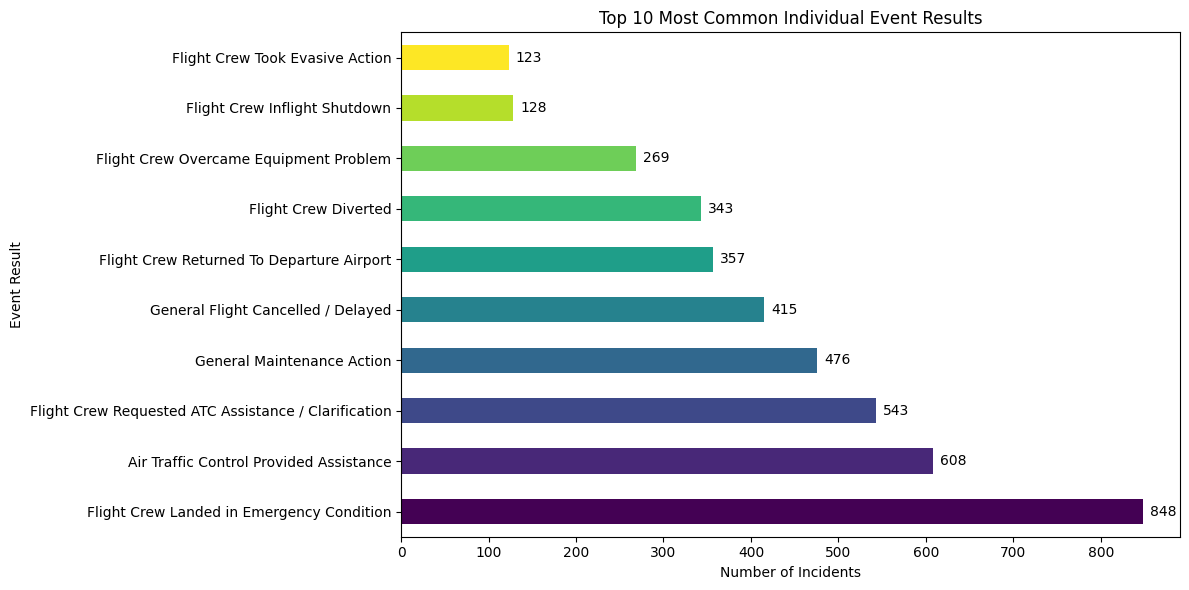

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files  # Import files for download

# Assuming 'df' is your DataFrame
# Split and explode the 'Events_Result' column
results_split = df['Events_Result'].str.split(';').explode().str.strip()

# Calculate frequencies
result_counts = results_split.value_counts()

# Plot top 10 individual outcomes
top_results = result_counts.head(10)  # Define top_results here

# Plot top 10 individual outcomes with count labels and color
plt.figure(figsize=(12, 6))
num_bars = len(top_results)
colors = plt.cm.get_cmap('viridis', num_bars)  # Choose a colormap
ax = top_results.plot(kind='barh', color=[colors(i) for i in range(num_bars)])  # Apply colors
plt.title('Top 10 Most Common Individual Event Results')
plt.xlabel('Number of Incidents')
plt.ylabel('Event Result')

# Add count labels to the right of the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.savefig('top_outcomes_chart.png')
plt.show()

# Download the saved file
# files.download('top_outcomes_chart.png')

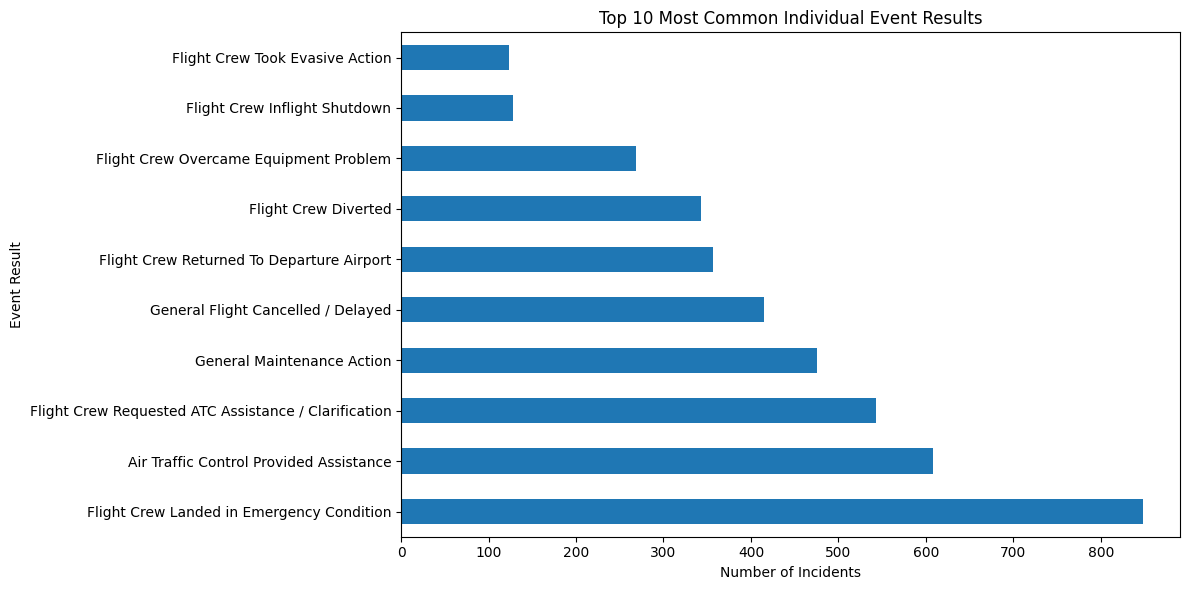

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Split and explode the 'Events_Result' column
results_split = df['Events_Result'].str.split(';').explode().str.strip()

# Calculate frequencies
result_counts = results_split.value_counts()

# Plot top 10 individual outcomes
top_results = result_counts.head(10)
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
top_results.plot(kind='barh')  # Change to horizontal bar chart
plt.title('Top 10 Most Common Individual Event Results')
plt.xlabel('Number of Incidents')  # Swap x and y labels
plt.ylabel('Event Result')  # Swap x and y labels
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.tight_layout()
plt.savefig('top_outcomes_chart.png')
plt.show()

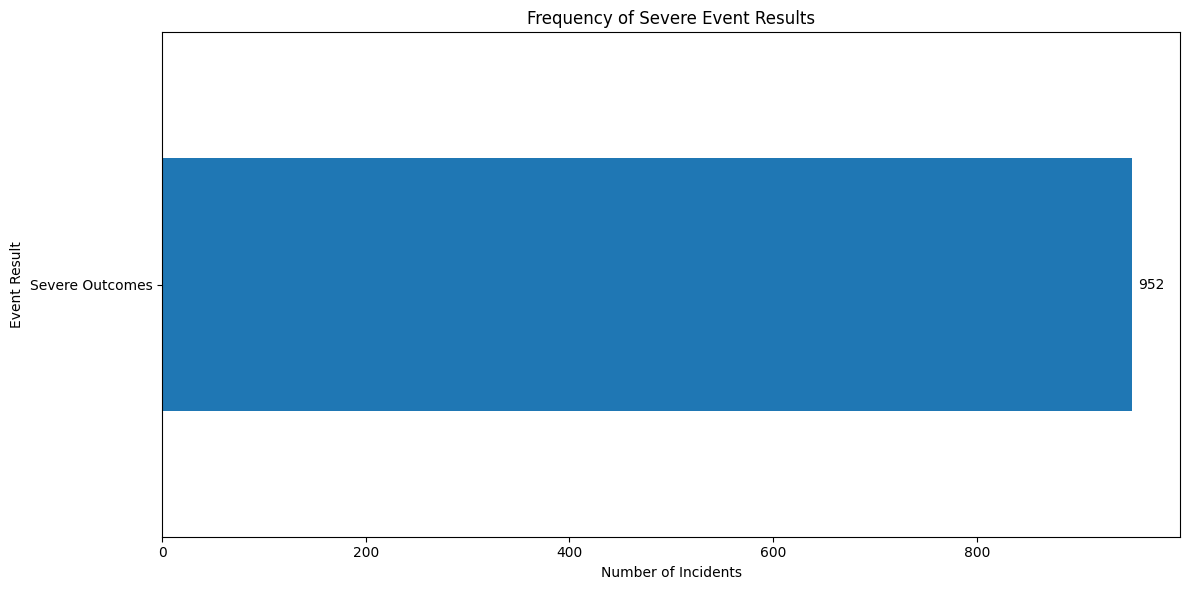

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

severe_keywords = ['injury', 'incapacitation', 'evacuated', 'damage', 'emergency']

# Calculate severe_counts
severe_counts = df['Events_Result'].str.contains('|'.join(severe_keywords), case=False).sum()
# Create a Series for plotting
severe_counts_series = pd.Series(severe_counts, index=['Severe Outcomes'], name='Count')


# Plot severe outcomes using a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = severe_counts_series.plot(kind='barh')  # Change to horizontal bar chart (barh)
plt.title('Frequency of Severe Event Results')
plt.xlabel('Number of Incidents')  # Swap x and y labels
plt.ylabel('Event Result')  # Swap x and y labels

# Add count labels to the right of the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('severe_outcomes_chart.png')  # Save the plot
plt.show()

In [36]:
import pandas as pd

# Assuming 'result_counts' is your Series containing the frequency of each event result

# Define a threshold for rarity, e.g., outcomes with fewer than 5 incidents
rare_threshold = 5
rare_results = result_counts[result_counts < rare_threshold]

# Create a DataFrame for the table
rare_outcomes_table = pd.DataFrame({'Event Result': rare_results.index, 'Count': rare_results.values})

# Display the table
print("Rare Outcomes (fewer than 5 incidents):")
print(rare_outcomes_table.to_string(index=False))  # Display table without index

Rare Outcomes (fewer than 5 incidents):
                                   Event Result  Count
          Air Traffic Control Separated Traffic      4
General Release Refused / Aircraft Not Accepted      3
                Flight Crew Overrode Automation      3
                           General Work Refused      1


<Figure size 1200x600 with 0 Axes>

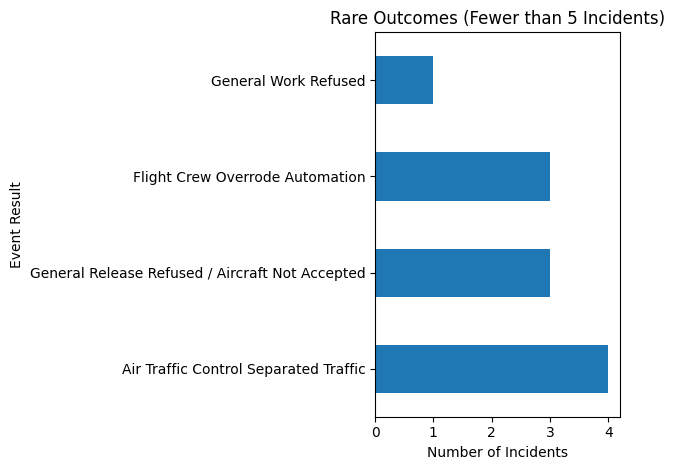

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ... (your existing code for defining rare_threshold and filtering rare_results)

# Create a horizontal bar chart for rare outcomes
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
rare_outcomes_table.plot(x='Event Result', y='Count', kind='barh', legend=False)
plt.title('Rare Outcomes (Fewer than 5 Incidents)')
plt.xlabel('Number of Incidents')
plt.ylabel('Event Result')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the plot to a file
plt.savefig('rare_outcomes_chart.png')  # Choose a filename

# Display the plot
plt.show()

# Download the saved file
# files.download('rare_outcomes_chart.png')

Verify and Prepare Dataset

In [38]:
print(f"Total rows: {len(df)}")
print(df[['Report 1_Narrative', 'Report 1_Synopsis']].isnull().sum())

Total rows: 1107
Report 1_Narrative    0
Report 1_Synopsis     0
dtype: int64


In [39]:
# Check for null values in narratives and synopses
null_narratives = df['Report 1_Narrative'].isnull().sum()
null_synopses = df['Report 1_Synopsis'].isnull().sum()

print(f"Number of null narratives: {null_narratives}")
print(f"Number of null synopses: {null_synopses}")



Number of null narratives: 0
Number of null synopses: 0


In [40]:
# Summarize dataset
total_rows = len(df)
print(f"Total number of incidents: {total_rows}")

Total number of incidents: 1107


In [41]:
# Check text lengths
df['narrative_length'] = df['Report 1_Narrative'].apply(lambda x: len(str(x).split()))
df['synopsis_length'] = df['Report 1_Synopsis'].apply(lambda x: len(str(x).split()))
print(f"Max narrative length (words): {df['narrative_length'].max()}")
print(f"Average narrative length (words): {df['narrative_length'].mean():.2f}")
print(f"Max synopsis length (words): {df['synopsis_length'].max()}")
print(f"Average synopsis length (words): {df['synopsis_length'].mean():.2f}")

Max narrative length (words): 2345
Average narrative length (words): 295.56
Max synopsis length (words): 83
Average synopsis length (words): 23.45


In [42]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [43]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=1cfa2f68dd1747f40f11edc6b09f7d09dc7bf9433dd75bd80c5a9be311092ed8
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


Fine Tuning using BART

Tokenize and Prepare the Dataset for Fine-Tuning

In [110]:
import os
import torch
import pandas as pd
from datasets import load_dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, BartTokenizer, BartForConditionalGeneration

# Set a fixed random seed for reproducibility
import numpy as np
import random
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load the cleaned dataset
dataset = load_dataset('csv', data_files='cleaned_ASRS_data.csv')

# Split dataset: 886 train, 110 val, 111 test with a fixed seed
dataset = dataset['train'].train_test_split(test_size=0.1, seed=random_seed)  # 111 test
train_val = dataset['train'].train_test_split(test_size=0.1111, seed=random_seed)  # 886 train, 110 val
train_dataset = train_val['train']
val_dataset = train_val['test']
test_dataset = dataset['test']

# Save the test dataset to a CSV file to ensure consistency
test_df = pd.DataFrame(test_dataset)
test_df.to_csv('test_split.csv', index=False)
print(f"Test dataset saved to 'test_split.csv' with {len(test_df)} samples")

Test dataset saved to 'test_split.csv' with 111 samples


In [120]:
# # Load dataset
# df = pd.read_csv('cleaned_ASRS_data.csv')

# Text Normalization
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9.,!? ]', '', text)
    return text

df['Report 1_Narrative'] = df['Report 1_Narrative'].apply(normalize_text)
df['Report 1_Synopsis'] = df['Report 1_Synopsis'].apply(normalize_text)

# Calculate narrative tokens
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
df['narrative_tokens'] = df['Report 1_Narrative'].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=True))
)

# Handle rare flight phases
def get_primary_phase(phase_str):
    return phase_str.split(';')[0].strip()

df['primary_flight_phase'] = df['Aircraft 1_Flight Phase'].apply(get_primary_phase)

# Remove rare classes with fewer than 2 samples
phase_counts = df['primary_flight_phase'].value_counts()
rare_phases = phase_counts[phase_counts < 2].index
df = df[~df['primary_flight_phase'].isin(rare_phases)]

Token indices sequence length is longer than the specified maximum sequence length for this model (1596 > 1024). Running this sequence through the model will result in indexing errors


In [48]:
!pip install transformers --upgrade

In [49]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='steps',  # Updated parameter name
    eval_steps=110,
    save_strategy='steps',
    save_steps=110,
    load_best_model_at_end=True,
    learning_rate=3e-5,
    run_name="bart_asrs_finetune_v1"
)
# Initialize model and trainer
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation']
)

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

In [50]:
# Train model
trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ehaabbasil1 (ehaabbasil1-university-of-maryland) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
110,7.046400,5.905604
220,3.975900,3.394558
330,0.749900,0.604503
440,0.466000,0.465779
550,0.414400,0.429277


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning:

Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.

There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=555, training_loss=3.734749172829293, metrics={'train_runtime': 2318.6835, 'train_samples_per_second': 1.906, 'train_steps_per_second': 0.239, 'total_flos': 9578602341335040.0, 'train_loss': 3.734749172829293, 'epoch': 5.0})

In [51]:
# Save model
model.save_pretrained('./fine_tuned_bart')
tokenizer.save_pretrained('./fine_tuned_bart')

('./fine_tuned_bart/tokenizer_config.json',
 './fine_tuned_bart/special_tokens_map.json',
 './fine_tuned_bart/vocab.json',
 './fine_tuned_bart/merges.txt',
 './fine_tuned_bart/added_tokens.json')

In [52]:
import torch
import os
from torch.utils.data import TensorDataset, DataLoader

# Enable expandable segments to reduce memory fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Clear unused GPU memory
torch.cuda.empty_cache()

# Verify GPU availability
assert torch.cuda.is_available(), "GPU is not available. Switch to a GPU runtime."

# Ensure model is on GPU
model = model.to('cuda')

# Prepare test inputs
test_inputs = tokenizer(test_df['Report 1_Narrative'].tolist(), max_length=1024, truncation=True, padding=True, return_tensors='pt')
input_ids = test_inputs['input_ids'].to('cuda')
attention_mask = test_inputs['attention_mask'].to('cuda')

# Create a dataset and dataloader for batching
dataset = TensorDataset(input_ids, attention_mask)
batch_size = 4  # Define batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Generate summaries in batches
generated_summaries = []
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    for batch in dataloader:
        batch_input_ids, batch_attention_mask = batch
        summary_ids = model.generate(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        batch_summaries = [tokenizer.decode(g, skip_special_tokens=True) for g in summary_ids]
        generated_summaries.extend(batch_summaries)

# Compute ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
ground_truth = test_df['Report 1_Synopsis'].tolist()
scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
for gen, ref in zip(generated_summaries, ground_truth):
    score = scorer.score(ref, gen)
    scores['rouge1'].append(score['rouge1'].fmeasure)
    scores['rouge2'].append(score['rouge2'].fmeasure)
    scores['rougeL'].append(score['rougeL'].fmeasure)

avg_scores = {key: sum(values) / len(values) for key, values in scores.items()}
print("Average ROUGE scores:", avg_scores)

Average ROUGE scores: {'rouge1': 0.3562758768747655, 'rouge2': 0.16405086976562816, 'rougeL': 0.30818503261345354}


In [53]:
# Calculate exceeds_1024
df['exceeds_1024'] = df['narrative_tokens'] > 1024

# Group by primary_flight_phase
stats_phase = df.groupby('primary_flight_phase')['narrative_tokens'].agg(
    mean='mean',
    median='median',
    max='max',
    count='count'
).reset_index()

stats_phase['proportion_exceeding'] = df.groupby('primary_flight_phase')['exceeds_1024'].mean().values

print("Narrative Length Statistics by Flight Phase:")
print(stats_phase)

Narrative Length Statistics by Flight Phase:
  primary_flight_phase        mean  median   max  count  proportion_exceeding
0                Climb  359.852843   253.0  2603    299              0.043478
1               Cruise  354.095238   255.0  2448    378              0.034392
2              Descent  302.857143   271.0   878    105              0.000000
3       Final Approach  309.074627   196.0  1557     67              0.029851
4     Initial Approach  328.163636   279.0  1115     55              0.018182
5        Initial Climb  290.129032   201.5  1736     62              0.016129
6              Landing  295.769231   189.0  1605     26              0.076923
7     Takeoff / Launch  369.375000   269.5  2199    112              0.044643
8                 Taxi  586.000000   586.0   852      2              0.000000


In [54]:
# Extract primary anomaly
df['primary_anomaly'] = df['Events_Anomaly'].apply(lambda x: x.split(';')[0].strip())

# Group by primary_anomaly
stats_anomaly = df.groupby('primary_anomaly')['narrative_tokens'].agg(
    mean='mean',
    median='median',
    max='max',
    count='count'
).reset_index()

stats_anomaly['proportion_exceeding'] = df.groupby('primary_anomaly')['exceeds_1024'].mean().values

print("Narrative Length Statistics by Primary Anomaly:")
print(stats_anomaly)

Narrative Length Statistics by Primary Anomaly:
                                      primary_anomaly         mean  median  \
0                                 ATC Issue All Types   379.961538   288.0   
1                 Aircraft Equipment Problem Critical   345.942285   261.0   
2              Aircraft Equipment Problem Less Severe   326.702290   237.0   
3                          Conflict Airborne Conflict   290.166667   280.0   
4                            Conflict Ground Conflict    76.000000    76.0   
5                                       Conflict NMAC   406.000000   406.0   
6   Deviation - Altitude Excursion From Assigned A...   447.000000   447.0   
7                         Deviation - Speed All Types   524.600000   529.0   
8      Deviation / Discrepancy - Procedural Clearance   368.000000   368.0   
9            Deviation / Discrepancy - Procedural FAR   456.333333   544.0   
10  Deviation / Discrepancy - Procedural Hazardous...   144.000000   144.0   
11  Deviation / 

In [101]:
from sentence_transformers import SentenceTransformer, util

# Load Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# After generating summaries
# Print all BART-generated summaries with ground truth for inspection
for i, (gen, ref, incident_id) in enumerate(zip(generated_summaries, ground_truth, test_df['_ACN'])):  # Include incident_id
    # Calculate cosine similarity
    gen_embedding = sbert_model.encode(gen, convert_to_tensor=True)
    ref_embedding = sbert_model.encode(ref, convert_to_tensor=True)
    cosine_sim = util.cos_sim(gen_embedding, ref_embedding).item()

    print(f"Sample {i+1} (Incident ID: {incident_id}):")  # Print incident_id
    print(f"Ground-Truth Synopsis: {ref}")
    print(f"BART-Generated Synopsis: {gen}")
    print(f"Cosine Similarity: {cosine_sim:.3f}")
    print("-" * 50)

Sample 1 (Incident ID: 2182426):
Ground-Truth Synopsis: B737 flight crew reported a cabin fumes event during takeoff resulting in a return to the departure airport.
BART-Generated Synopsis: b737800 flight crew reported a loss of pressurization during initial climb
Cosine Similarity: 0.428
--------------------------------------------------
Sample 2 (Incident ID: 2133126):
Ground-Truth Synopsis: B737 Captain reported a failure of the #2 Generator Drive; followed by an APU auto-shutdown due to a fault. Flight continued to destination.
BART-Generated Synopsis: b737800 flight crew reported multiple brake faults during approach. the flight crew executed a
Cosine Similarity: 0.599
--------------------------------------------------
Sample 3 (Incident ID: 1807398):
Ground-Truth Synopsis: A330 cabin crew reported smelling an odd odor in flight. After landing the reporters received medical attention for the effects of the odor.
BART-Generated Synopsis: b737800 flight crew reported engine oil filt

In [104]:
from rouge_score import rouge_scorer

# ... (your existing code for loading models and generating summaries) ...

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate and store ROUGE scores for all summaries
all_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
for gen, ref in zip(generated_summaries, ground_truth):
    scores = scorer.score(ref, gen)
    all_rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
    all_rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
    all_rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)

# Calculate average ROUGE scores
avg_rouge_scores = {key: sum(values) / len(values) for key, values in all_rouge_scores.items()}

# Print average ROUGE scores
print("Average ROUGE Scores for BART:")
for metric, score in avg_rouge_scores.items():
    print(f"{metric}: {score:.3f}")

Average ROUGE Scores for BART:
rouge1: 0.218
rouge2: 0.080
rougeL: 0.194


In [56]:
# After generating summaries and computing ROUGE scores
# Display incident ID, narrative, ground-truth synopsis, and BART-generated synopsis for comparison
for idx in range(len(test_df)):
    print(f"Sample {idx+1}:")
    print(f"Incident ID: {test_df['_ACN'].iloc[idx]}")
    print(f"Narrative: {test_df['Report 1_Narrative'].iloc[idx]}")
    print(f"Ground-Truth Synopsis: {ground_truth[idx]}")
    print(f"BART-Generated Synopsis: {generated_summaries[idx]}")
    print("-" * 80)

Sample 1:
Incident ID: 2182426
Narrative: after engine start on initial pushback we noticed a fwd eqpt val eicas in conjunction with a valve annunciator illuminated on the overhead panel.  we contacted dispatch and maintenance ran the appropriate checklist didnt fix it then coordinated a return to gate.  with no parts available to replace the valve mx maintenance applied an mel which i believe locked the valve closed.  after work was completed and paperwork sorted we taxied out and took off approximately one hour late.  on climb out approaching fl100 we noticed that the cabin pressure was having a hard time keeping up with the climb.  i decreased my climb rate to give the pressurization system time to catch up and eventually leveled off at approximately fl120.  it was during this time that we got a cabin altitude warning horn. we immediately accomplished the cabin altitude qrc checklist donning our o2 masks and coordinating a descent to fl80.  the warning horn ceased sometime during th

In [57]:
from sentence_transformers import SentenceTransformer, util

# Load Sentence-BERT model for cosine similarity
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Display incident ID, narrative, ground-truth synopsis, BART-generated synopsis, and cosine similarity
for idx in range(len(test_df)):
    # Compute cosine similarity
    gen = generated_summaries[idx]
    ref = ground_truth[idx]
    gen_embedding = sbert_model.encode(gen, convert_to_tensor=True)
    ref_embedding = sbert_model.encode(ref, convert_to_tensor=True)
    cosine_sim = util.cos_sim(gen_embedding, ref_embedding).item()

    print(f"Sample {idx+1}:")
    print(f"Incident ID: {test_df['_ACN'].iloc[idx]}")
    print(f"Narrative: {test_df['Report 1_Narrative'].iloc[idx]}")
    print(f"Ground-Truth Synopsis: {ground_truth[idx]}")
    print(f"BART-Generated Synopsis: {gen}")
    print(f"Cosine Similarity: {cosine_sim:.3f}")
    print("-" * 80)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sample 1:
Incident ID: 2182426
Narrative: after engine start on initial pushback we noticed a fwd eqpt val eicas in conjunction with a valve annunciator illuminated on the overhead panel.  we contacted dispatch and maintenance ran the appropriate checklist didnt fix it then coordinated a return to gate.  with no parts available to replace the valve mx maintenance applied an mel which i believe locked the valve closed.  after work was completed and paperwork sorted we taxied out and took off approximately one hour late.  on climb out approaching fl100 we noticed that the cabin pressure was having a hard time keeping up with the climb.  i decreased my climb rate to give the pressurization system time to catch up and eventually leveled off at approximately fl120.  it was during this time that we got a cabin altitude warning horn. we immediately accomplished the cabin altitude qrc checklist donning our o2 masks and coordinating a descent to fl80.  the warning horn ceased sometime during th

In [89]:
from sentence_transformers import SentenceTransformer, util

# Load Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Assuming you have generated_summaries and ground_truth lists
cosine_similarities = []
for gen, ref in zip(generated_summaries, ground_truth):
    gen_embedding = sbert_model.encode(gen, convert_to_tensor=True)
    ref_embedding = sbert_model.encode(ref, convert_to_tensor=True)
    cosine_sim = util.cos_sim(gen_embedding, ref_embedding).item()
    cosine_similarities.append(cosine_sim)

# Calculate average cosine similarity
avg_cosine_sim = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {avg_cosine_sim:.3f}")

Average Cosine Similarity: 0.620


In [122]:
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util

# Load the saved test split
test_dataset = load_dataset('csv', data_files='test_split.csv')['train']
test_df = pd.DataFrame(test_dataset)

# Load tokenizers and models
t5_tokenizer = T5Tokenizer.from_pretrained('./results_t5')
t5_model = T5ForConditionalGeneration.from_pretrained('./results_t5')
bart_tokenizer = BartTokenizer.from_pretrained('./fine_tuned_bart')
bart_model = BartForConditionalGeneration.from_pretrained('./fine_tuned_bart')

T5

In [126]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [127]:
import torch
torch.cuda.empty_cache()

In [93]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import load_dataset

# Text Normalization
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9.,!? ]', '', text)
    return text

df['Report 1_Narrative'] = df['Report 1_Narrative'].apply(normalize_text)
df['Report 1_Synopsis'] = df['Report 1_Synopsis'].apply(normalize_text)


# Load dataset
dataset = load_dataset('csv', data_files='cleaned_ASRS_data.csv')
dataset = dataset['train'].train_test_split(test_size=0.1)
train_val = dataset['train'].train_test_split(test_size=0.1111)  # To get 886 train, 110 val
train_dataset = train_val['train']
val_dataset = train_val['test']
test_dataset = dataset['test']

# Tokenize
tokenizer = T5Tokenizer.from_pretrained('t5-base')

def preprocess_function(examples):
    inputs = ["summarize: " + text for text in examples['Report 1_Narrative']]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length')
    labels = tokenizer(examples['Report 1_Synopsis'], max_length=150, truncation=True, padding='max_length')
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Fine-tune
model = T5ForConditionalGeneration.from_pretrained('t5-base')
training_args = TrainingArguments(
    output_dir='./results_t5',
    num_train_epochs=5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_t5',
    eval_strategy="epoch",  # Updated from evaluation_strategy
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
trainer.train()

Map:   0%|          | 0/885 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,No log,0.486547
2,2.535100,0.439683
3,0.452600,0.425305
4,0.379100,0.424677
5,0.340100,0.424872


TrainOutput(global_step=2215, training_loss=0.8704870150805057, metrics={'train_runtime': 1249.8785, 'train_samples_per_second': 3.54, 'train_steps_per_second': 1.772, 'total_flos': 5389277331456000.0, 'train_loss': 0.8704870150805057, 'epoch': 5.0})

In [94]:
generated_summaries_t5 = []
model.eval()
with torch.no_grad():
    for example in test_dataset:
        input_ids = tokenizer("summarize: " + example['Report 1_Narrative'], return_tensors='pt', max_length=512, truncation=True).input_ids.to('cuda')
        outputs = model.generate(input_ids, max_length=150, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
        generated_summaries_t5.append(summary)

In [133]:
torch.cuda.empty_cache()


In [138]:
# Ensure the device is set correctly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to the correct device
t5_model.to(device)
bart_model.to(device)

# Generate T5 summaries
t5_inputs = ["summarize: " + text for text in test_dataset['Report 1_Narrative']]
t5_input_encodings = t5_tokenizer(t5_inputs, max_length=256, truncation=True, padding=True, return_tensors='pt')
t5_input_ids = t5_input_encodings['input_ids'].to(device)
t5_attention_mask = t5_input_encodings['attention_mask'].to(device)

with torch.no_grad():
    t5_summary_ids = t5_model.generate(
        input_ids=t5_input_ids,
        attention_mask=t5_attention_mask,
        max_length=64,
        num_beams=4,
        early_stopping=True
    )
t5_summaries = [t5_tokenizer.decode(g, skip_special_tokens=True) for g in t5_summary_ids]

# Generate BART summaries
bart_inputs = bart_tokenizer(test_dataset['Report 1_Narrative'], max_length=256, truncation=True, padding=True, return_tensors='pt')
bart_input_ids = bart_inputs['input_ids'].to(device)
bart_attention_mask = bart_inputs['attention_mask'].to(device)

with torch.no_grad():
    bart_summary_ids = bart_model.generate(
        input_ids=bart_input_ids,
        attention_mask=bart_attention_mask,
        max_length=64,
        num_beams=4,
        early_stopping=True
    )
bart_summaries = [bart_tokenizer.decode(g, skip_special_tokens=True) for g in bart_summary_ids]

# Compute ROUGE scores and Cosine Similarities
ground_truth = test_dataset['Report 1_Synopsis']
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Lists to store scores
bart_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
t5_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
bart_cosine_similarities = []
t5_cosine_similarities = []

for idx, (gt_synopsis, bart_summary, t5_summary, incident_id) in enumerate(zip(ground_truth, bart_summaries, t5_summaries, test_df['_ACN'])):
    # ROUGE scores
    bart_rouge = scorer.score(gt_synopsis, bart_summary)
    t5_rouge = scorer.score(gt_synopsis, t5_summary)

    bart_rouge_scores['rouge1'].append(bart_rouge['rouge1'].fmeasure)
    bart_rouge_scores['rouge2'].append(bart_rouge['rouge2'].fmeasure)
    bart_rouge_scores['rougeL'].append(bart_rouge['rougeL'].fmeasure)
    t5_rouge_scores['rouge1'].append(t5_rouge['rouge1'].fmeasure)
    t5_rouge_scores['rouge2'].append(t5_rouge['rouge2'].fmeasure)
    t5_rouge_scores['rougeL'].append(t5_rouge['rougeL'].fmeasure)

    # Cosine Similarities
    bart_embedding = sbert_model.encode(bart_summary, convert_to_tensor=True)
    t5_embedding = sbert_model.encode(t5_summary, convert_to_tensor=True)
    gt_embedding = sbert_model.encode(gt_synopsis, convert_to_tensor=True)

    bart_cos_sim = util.cos_sim(bart_embedding, gt_embedding).item()
    t5_cos_sim = util.cos_sim(t5_embedding, gt_embedding).item()

    bart_cosine_similarities.append(bart_cos_sim)
    t5_cosine_similarities.append(t5_cos_sim)

# Average scores
avg_bart_rouge = {key: sum(values) / len(values) for key, values in bart_rouge_scores.items()}
avg_t5_rouge = {key: sum(values) / len(values) for key, values in t5_rouge_scores.items()}
avg_bart_cos_sim = sum(bart_cosine_similarities) / len(bart_cosine_similarities)
avg_t5_cos_sim = sum(t5_cosine_similarities) / len(t5_cosine_similarities)

print("BART Average ROUGE Scores:", avg_bart_rouge)
print("T5 Average ROUGE Scores:", avg_t5_rouge)
print("BART Average Cosine Similarity:", avg_bart_cos_sim)
print("T5 Average Cosine Similarity:", avg_t5_cos_sim)

# Save summaries with incident IDs for reference
results_df = pd.DataFrame({
    '_ACN': test_df['_ACN'],
    'Ground_Truth_Synopsis': ground_truth,
    'BART_Summary': bart_summaries,
    'T5_Summary': t5_summaries
})
results_df.to_csv('summaries_with_incident_ids.csv', index=False)
print("Summaries saved to 'summaries_with_incident_ids.csv'")


OutOfMemoryError: CUDA out of memory. Tried to allocate 112.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 112.12 MiB is free. Process 16842 has 14.63 GiB memory in use. Of the allocated memory 14.28 GiB is allocated by PyTorch, and 215.11 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [109]:
# Print a few summaries for inspection, including incident number
for i, (gen_summary, ref_summary, incident_id) in enumerate(zip(
    generated_summaries_t5[:100],
    test_dataset['Report 1_Synopsis'][:100],
    test_dataset['_ACN'][:100]  # Include incident_id
)):
    print(f"Sample {i+1} (Incident ID: {incident_id}):")
    print(f"Ground-Truth Synopsis: {ref_summary}")
    print(f"T5-Generated Synopsis: {gen_summary}")
    print("-" * 50)

Sample 1 (Incident ID: 1726224):
Ground-Truth Synopsis: B737NG Flight Crew reported continuing to destination with a low pressure caution on the A system hydraulics; and as they approached destination; a low pressure caution on the B system hydraulics.
T5-Generated Synopsis: b737800 flight crew reported a hydraulic system malfunction during climb. flight crew continued to destination airport and landed uneventfully.
--------------------------------------------------
Sample 2 (Incident ID: 1541785):
Ground-Truth Synopsis: B737-800 flight crew reported a right engine low oil issue during climbout and elected to divert.
T5-Generated Synopsis: b737800 flight crew reported an engine oil filter bypass light illuminated during climbout. the flight crew diverted and landed uneventfully.
--------------------------------------------------
Sample 3 (Incident ID: 1618220):
Ground-Truth Synopsis: Flight Attendant reported lack of oxygen and a feeling of hypoxia and that the pilot advised that they;

In [99]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
ground_truth = test_dataset['Report 1_Synopsis']
for gen, ref in zip(generated_summaries_t5, ground_truth):
    scores = scorer.score(ref, gen)
    rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
    rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
    rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)

avg_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
avg_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
avg_rougel = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])
print(f"T5-Base ROUGE Scores: R-1: {avg_rouge1:.3f}, R-2: {avg_rouge2:.3f}, R-L: {avg_rougel:.3f}")

T5-Base ROUGE Scores: R-1: 0.422, R-2: 0.206, R-L: 0.376


In [84]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
ground_truth = test_dataset['Report 1_Synopsis']
for gen, ref in zip(generated_summaries_t5, ground_truth):
    scores = scorer.score(ref, gen)
    rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
    rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
    rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)

avg_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
avg_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
avg_rougel = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])
print(f"T5-Base ROUGE Scores: R-1: {avg_rouge1:.3f}, R-2: {avg_rouge2:.3f}, R-L: {avg_rougel:.3f}")

T5-Base ROUGE Scores: R-1: 0.432, R-2: 0.204, R-L: 0.373


In [77]:
!nvidia-smi

Sun Apr 27 23:59:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P0             27W /   70W |    5216MiB /  15360MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [78]:
import re
import os
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import load_dataset

# Set environment variable for memory management
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Clear GPU memory
torch.cuda.empty_cache()

# Text Normalization
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9.,!? ]', '', text)
    return text

# Load dataset
dataset = load_dataset('csv', data_files='cleaned_ASRS_data.csv')
df = dataset['train'].to_pandas()
df['Report 1_Narrative'] = df['Report 1_Narrative'].apply(normalize_text)
df['Report 1_Synopsis'] = df['Report 1_Synopsis'].apply(normalize_text)

# Save the normalized dataset back to a CSV and reload
df.to_csv('normalized_ASRS_data.csv', index=False)
dataset = load_dataset('csv', data_files='normalized_ASRS_data.csv')

# Split dataset: 886 train, 110 val, 111 test
dataset = dataset['train'].train_test_split(test_size=0.1)  # 111 test
train_val = dataset['train'].train_test_split(test_size=0.1111)  # 886 train, 110 val
train_dataset = train_val['train']
val_dataset = train_val['test']
test_dataset = dataset['test']

# Tokenize
tokenizer = T5Tokenizer.from_pretrained('t5-base')

def preprocess_function(examples):
    inputs = ["summarize: " + text for text in examples['Report 1_Narrative']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding='max_length')  # Reduced max_length
    labels = tokenizer(examples['Report 1_Synopsis'], max_length=128, truncation=True, padding='max_length')  # Reduced max_length
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Fine-tune
model = T5ForConditionalGeneration.from_pretrained('t5-base')

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

training_args = TrainingArguments(
    output_dir='./results_t5',
    num_train_epochs=5,
    per_device_train_batch_size=1,  # Reduced batch size
    per_device_eval_batch_size=1,   # Reduced batch size
    gradient_accumulation_steps=4,  # Simulate effective batch size of 4
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_t5',
    eval_strategy="epoch",
    fp16=True,  # Enable mixed precision training
    save_strategy="epoch",  # Save model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/885 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,No log,0.619493
2,No log,0.506157
3,2.533500,0.473706
4,0.464300,0.459273


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=1105, training_loss=1.3967891882987045, metrics={'train_runtime': 942.4579, 'train_samples_per_second': 4.695, 'train_steps_per_second': 1.172, 'total_flos': 2684286381588480.0, 'train_loss': 1.3967891882987045, 'epoch': 4.980790960451977})

In [79]:
# Explicitly save the model after training
trainer.save_model('./results_t5')
tokenizer.save_pretrained('./results_t5')

('./results_t5/tokenizer_config.json',
 './results_t5/special_tokens_map.json',
 './results_t5/spiece.model',
 './results_t5/added_tokens.json')

In [106]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader, Dataset

# Set environment variable for memory management
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Clear GPU memory
torch.cuda.empty_cache()

# Load the fine-tuned model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('./results_t5')
tokenizer = T5Tokenizer.from_pretrained('./results_t5')
model.to('cuda')
model.eval()

# Load the test dataset
dataset = load_dataset('csv', data_files='cleaned_ASRS_data.csv')
dataset = dataset['train'].train_test_split(test_size=0.1)
test_dataset = dataset['test']

# Prepare inputs for generation
inputs = ["summarize: " + text for text in test_dataset['Report 1_Narrative']]
input_encodings = tokenizer(inputs, max_length=512, truncation=True, padding=True, return_tensors='pt')

# Create a dataset for batching
class SummaryDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings.input_ids)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

summary_dataset = SummaryDataset(input_encodings)
batch_size = 2
dataloader = DataLoader(summary_dataset, batch_size=batch_size, shuffle=False)

# Generate summaries in batches
generated_summaries_t5 = []
with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to('cuda')
        attention_mask = batch['attention_mask'].to('cuda')
        outputs = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=150,
            num_beams=4,
            early_stopping=True
        )
        summaries = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
        generated_summaries_t5.extend(summaries)

# Print a few summaries for inspection
for i, (gen_summary, ref_summary) in enumerate(zip(generated_summaries_t5[:100], test_dataset['Report 1_Synopsis'][:5])):
    print(f"Sample {i+1}:")
    print(f"Ground-Truth Synopsis: {ref_summary}")
    print(f"T5-Generated Synopsis: {gen_summary}")
    print("-" * 50)

Sample 1:
Ground-Truth Synopsis: B737NG Flight Crew reported continuing to destination with a low pressure caution on the A system hydraulics; and as they approached destination; a low pressure caution on the B system hydraulics.
T5-Generated Synopsis: b737800 flight crew reported a hydraulic system malfunction during climb. flight crew continued to destination airport and landed uneventfully.
--------------------------------------------------
Sample 2:
Ground-Truth Synopsis: B737-800 flight crew reported a right engine low oil issue during climbout and elected to divert.
T5-Generated Synopsis: b737800 flight crew reported an engine oil filter bypass light illuminated during climbout. the flight crew diverted and landed uneventfully.
--------------------------------------------------
Sample 3:
Ground-Truth Synopsis: Flight Attendant reported lack of oxygen and a feeling of hypoxia and that the pilot advised that they; 'shouldn't be experiencing these symptoms.'
T5-Generated Synopsis: b

In [136]:
# Print a few summaries for inspection
for i, (gen_summary, ref_summary) in enumerate(zip(generated_summaries_t5[:], test_dataset['Report 1_Synopsis'][:30])):
    print(f"Sample {i+1}:")
    print(f"Ground-Truth Synopsis: {ref_summary}")
    print(f"T5-Generated Synopsis: {gen_summary}")
    print("-" * 50)

Sample 1:
Ground-Truth Synopsis: B737NG Flight Crew reported continuing to destination with a low pressure caution on the A system hydraulics; and as they approached destination; a low pressure caution on the B system hydraulics.
T5-Generated Synopsis: b737800 flight crew reported a hydraulic system malfunction during climb. flight crew continued to destination airport and landed uneventfully.
--------------------------------------------------
Sample 2:
Ground-Truth Synopsis: B737-800 flight crew reported a right engine low oil issue during climbout and elected to divert.
T5-Generated Synopsis: b737800 flight crew reported an engine oil filter bypass light illuminated during climbout. the flight crew diverted and landed uneventfully.
--------------------------------------------------
Sample 3:
Ground-Truth Synopsis: Flight Attendant reported lack of oxygen and a feeling of hypoxia and that the pilot advised that they; 'shouldn't be experiencing these symptoms.'
T5-Generated Synopsis: b

In [90]:
from sentence_transformers import SentenceTransformer, util

# Load Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Assuming you have generated_summaries_t5 and ground_truth lists
t5_cosine_similarities = []
for gen_t5, ref in zip(generated_summaries_t5, ground_truth):
    gen_t5_embedding = sbert_model.encode(gen_t5, convert_to_tensor=True)
    ref_embedding = sbert_model.encode(ref, convert_to_tensor=True)
    cosine_sim_t5 = util.cos_sim(gen_t5_embedding, ref_embedding).item()
    t5_cosine_similarities.append(cosine_sim_t5)

# Calculate average cosine similarity for T5
avg_cosine_sim_t5 = sum(t5_cosine_similarities) / len(t5_cosine_similarities)
print(f"Average T5 Cosine Similarity: {avg_cosine_sim_t5:.3f}")

Average T5 Cosine Similarity: 0.666


In [114]:
!nvidia-smi

Mon Apr 28 03:54:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P0             28W /   70W |   15034MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----